<a href="https://colab.research.google.com/github/waleedmalik1475/Boston_Housing/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
df=pd.read_csv('/content/BostonHousing.csv')
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [44]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


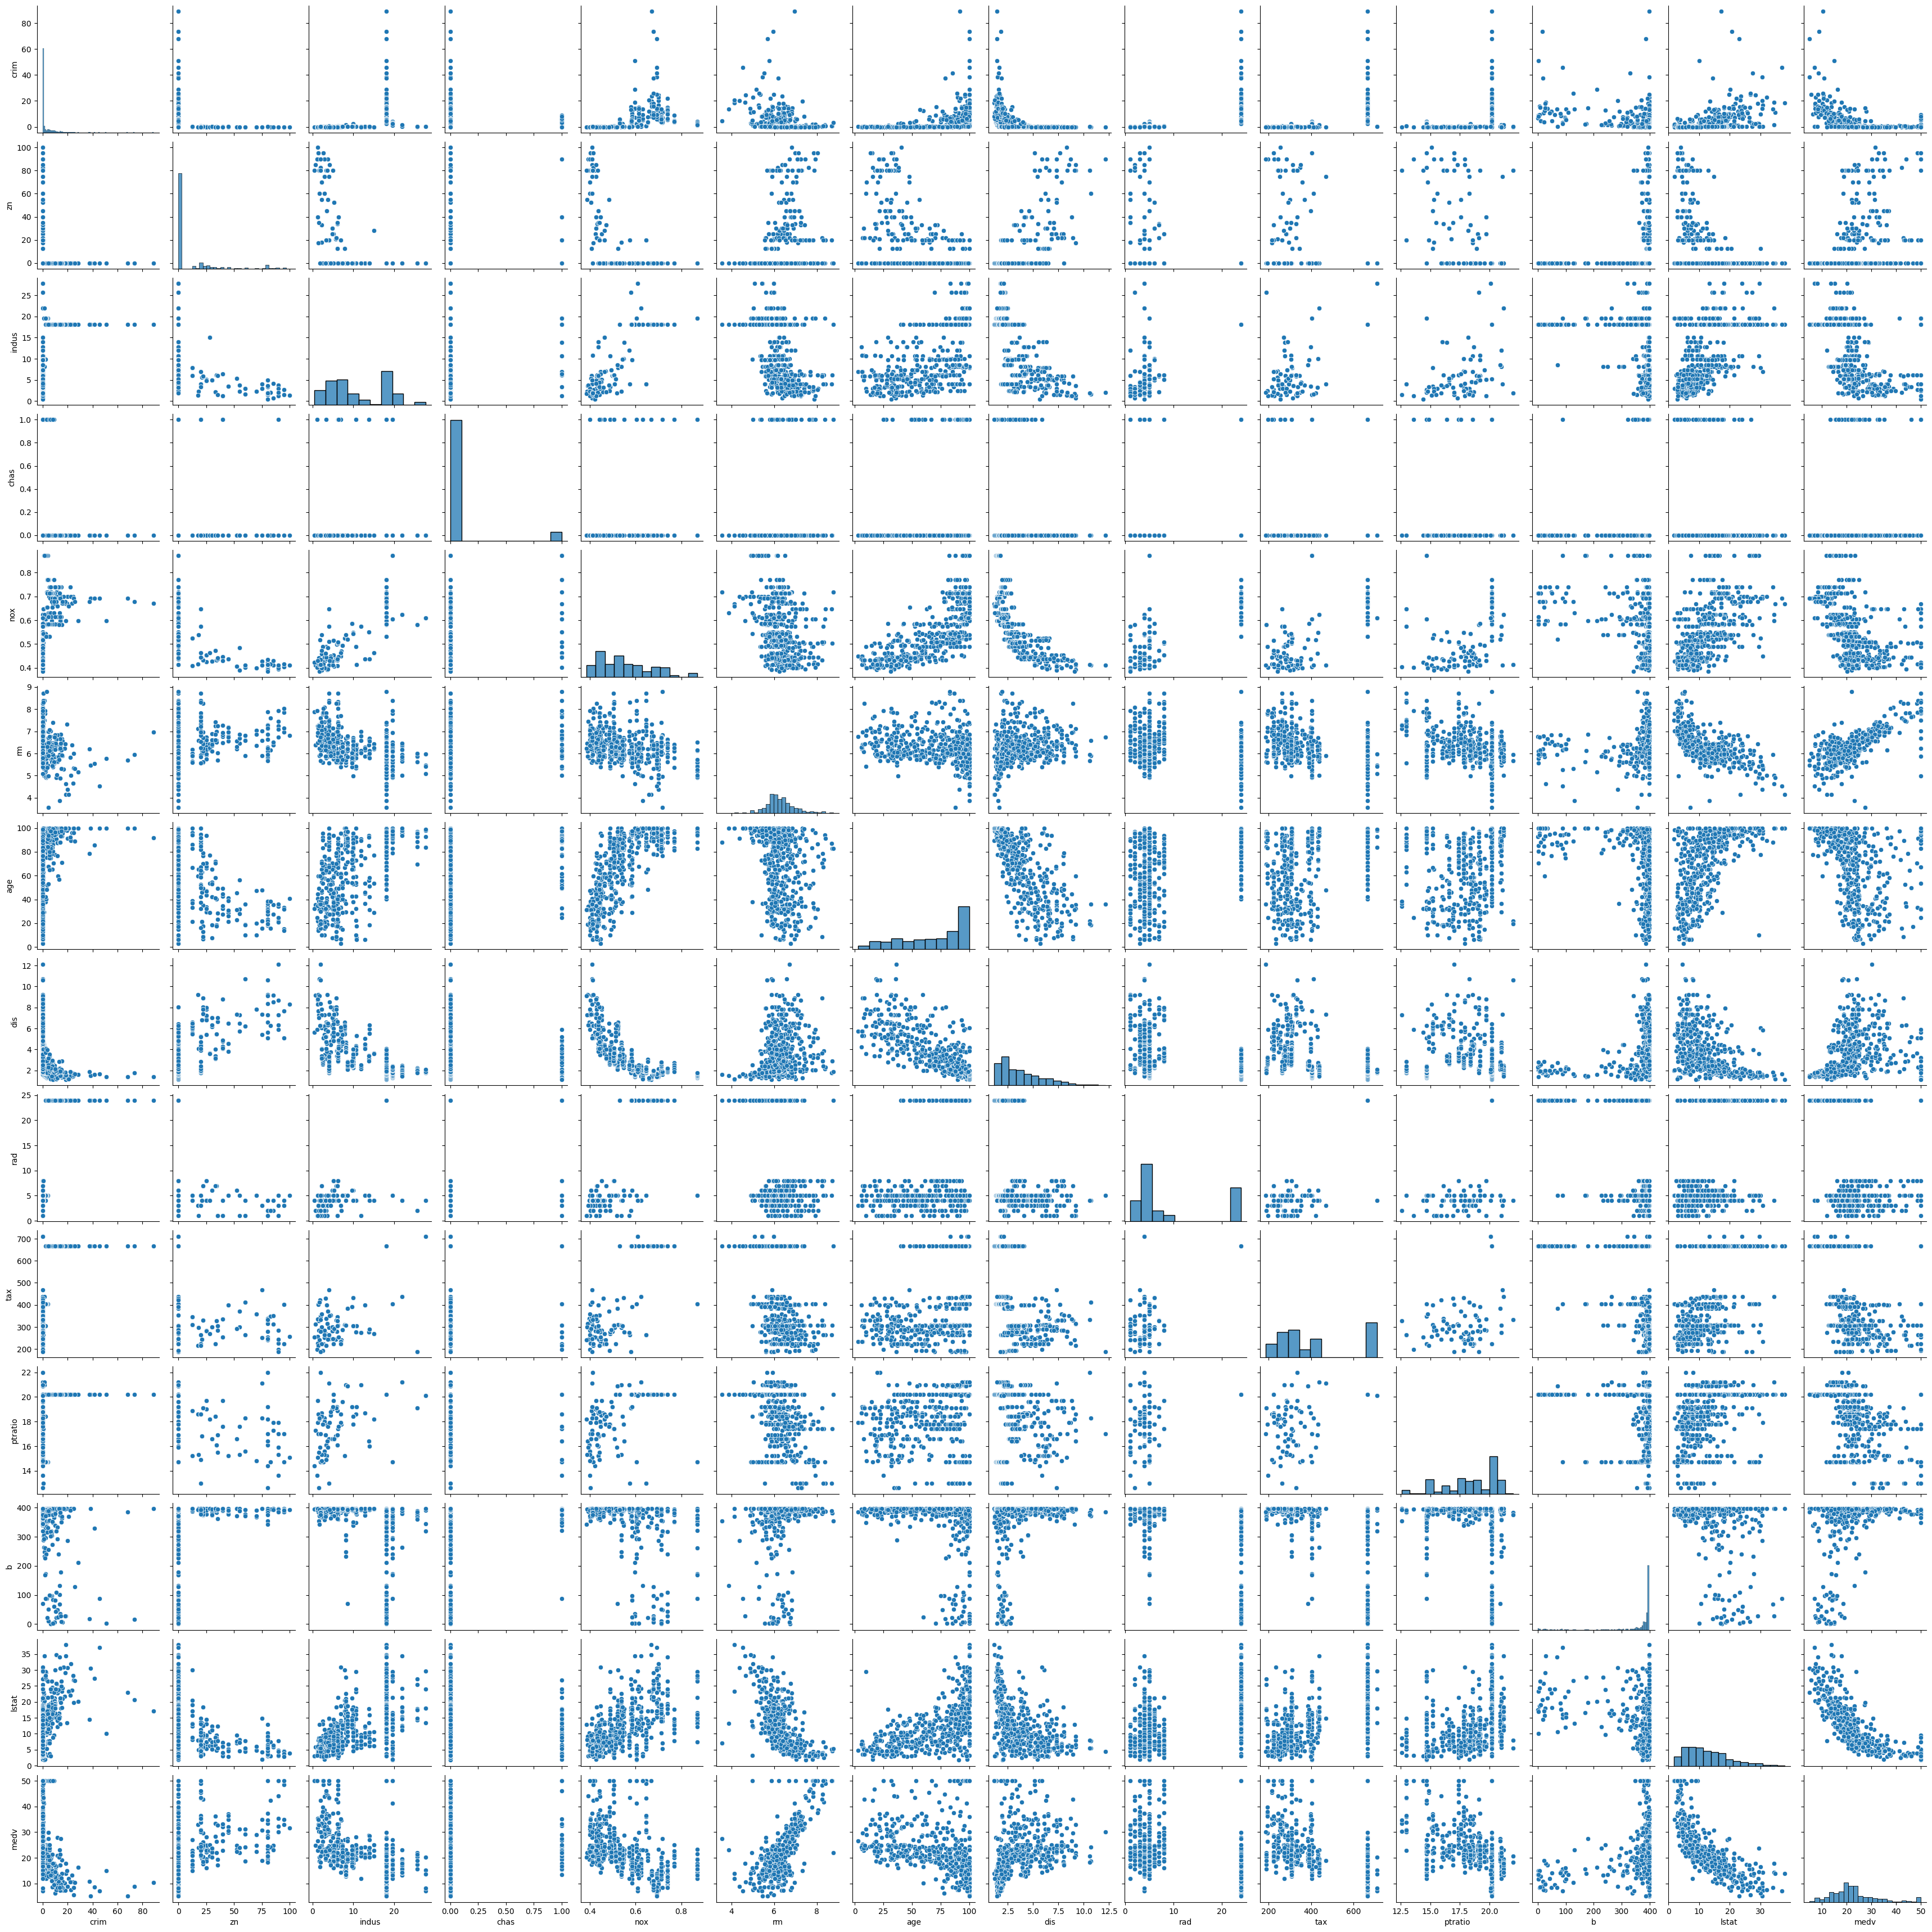

In [45]:
# Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

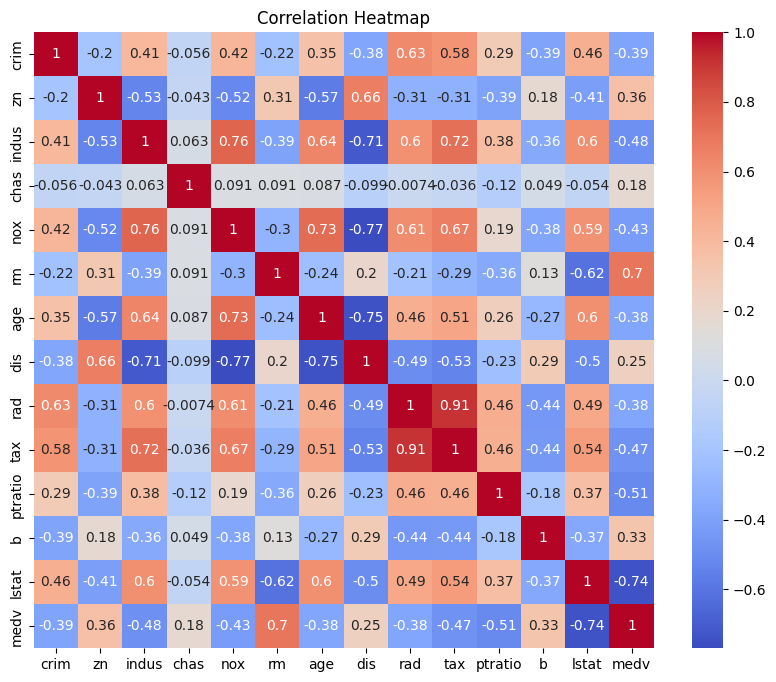

In [46]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Data Preprocessing

# Handle missing values

In [48]:
df.fillna(df.mean(), inplace=True)

In [49]:
# Encode categorical variables

In [50]:
df['chas'] = df['chas'].astype('category')
df['chas'] = df['chas'].cat.codes

In [51]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']] = scaler.fit_transform(df[['rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']])

In [52]:
# Split the data into training and testing sets
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

In [55]:
# Evaluate the model using MSE and R² Score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'MSE (Linear Regression): {mse_lr:.2f}')
print(f'R² Score (Linear Regression): {r2_lr:.2f}')

MSE (Linear Regression): 24.40
R² Score (Linear Regression): 0.67


In [56]:
# Train a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [57]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [58]:
# Evaluate the model using MSE and R² Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE (Random Forest): {mse_rf:.2f}')
print(f'R² Score (Random Forest): {r2_rf:.2f}')

MSE (Random Forest): 7.86
R² Score (Random Forest): 0.89


In [59]:
#XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [60]:
# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")

XGBoost - MSE: 7.217769116634085, R²: 0.9015764794125712


In [61]:
# Perform hyperparameter tuning using GridSearchCV

# Define the hyperparameter grid for the random forest model
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


In [62]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [63]:
# Print the best hyperparameters and the corresponding MSE
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best MSE: {-grid_search.best_score_:.2f}')


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best MSE: 14.88


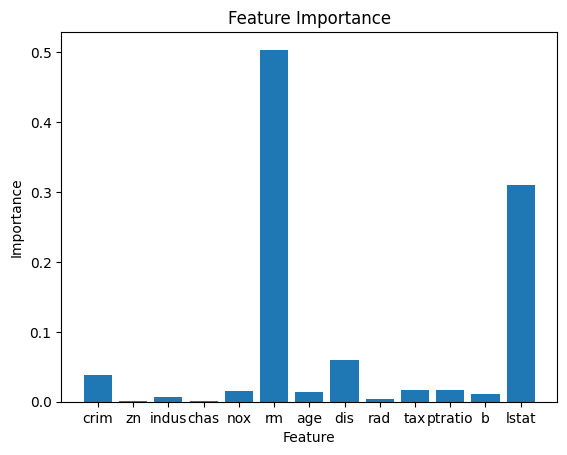

In [64]:
# Visualize the feature importance using a bar chart
feature_importances = grid_search.best_estimator_.feature_importances_
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [65]:
# Save the best model
import joblib
joblib.dump(rf_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [66]:
# Load the model (for future use)
# best_rf = joblib.load('best_random_forest_model.pkl')